## Diffusion Patterns

The 2D Diffusion problem is :

\\( \large{  \frac{\partial U}{\partial t} = D\left(\frac{\partial^2U}{\partial x^2} + \frac{\partial^2U}{\partial y^2}\right)} \\)

[Source](https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/)

In [3]:
import numpy as np
import random as random
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

- Consider a 2D lattice of length L

In [4]:
L = 10

- Create initial configuration: We can use a vacant list to create initial configuration where initially particle is at middle of the lattice.

In [5]:
def start(L):
    '''create a vacant list of list '''
    P =  [[0 for i in range(L)]for j in range(L)]
    
    '''put particle at center'''
    P[int(L/2)][int(L/2)] = 1
    
    return P

In [6]:
P =start(L)
P

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

- Make a plot of the lattice.

In [7]:
plt.figure(figsize = [4,3])
sns.heatmap(P,annot=True,cmap='YlGn')

- Create a function to diffuse a particle:

\\( P[i,j] = P[i+1,j] + P[i-1,j] + P[i,j+1] + P[i,j-1] \\)

In [8]:
def diffuse_primitive(P,L):
    
    '''create vacant list of list'''
    PP =  [[0 for i in range(L)]for j in range(L)]
    
    for i in range(L):
          for j in range(L):
                '''diffuse one step'''
                PP[i][j] = P[i+1][j] + P[i-1][j] + P[i][j+1] + P[i][j-1]
                
    '''normalize'''
    PP = PP/np.sum(PP)
    
    return PP   

In [9]:
L =10
P =start(L)

- Set boundary conditons

1. Lower limit
```
P[0-1,j] = P[L,j]
P[I,0-1] = P[i,L]
```

2. Upper limit
```
P[L+1,j] = P[o,j]
P[i,L+1] = P[i,0]
```

In [10]:
def diffuse(P,L):
    
    '''create vacant list of list'''
    PP =  [[0 for i in range(L)]for j in range(L)]
    
    '''diffuse 1-step over supplied configuration'''
    for i in range(L):
          for j in range(L):
                
            '''set boundary condition at bottom and left'''    
            ni =0; nj =0
            if i==0:ni = L
            if j==0:nj = L
            
            '''add modulo to control boundary at top and right'''
            PP[i][j] = P[(i+1)%L][j] + P[(i-1) + ni][j]\
            + P[i][(j+1)%L] + P[i][(j-1)+nj]
            
    '''normalize'''        
    PP = PP/np.sum(PP)
    
    return PP

In [16]:
L =10
P =start(L)
plt.figure(figsize = [12,10])
plt.subplot(3,3,1)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,2)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,3)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,4)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,5)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,6)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,7)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,8)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.subplot(3,3,9)
P = diffuse(P,L)
sns.heatmap(P,annot=False,cmap='YlGn')
plt.show()

- Run the diffusion step with desire no of running steps 

In [19]:
def run_diffuse(P,nrun,L):
    
    run = 0
    
    '''diffuse N times'''
    while run < nrun:
        P = diffuse(P,L)
        run = run+1
    return P

We can make a plot of arbitraty diffusion step by selecting ```irun``` in function runner.

In [20]:
'''set parameters'''
L = 100 ; nrun = 1000 ; P = start(L)

'''run diffusion'''
P = run_diffuse(P,nrun,L)


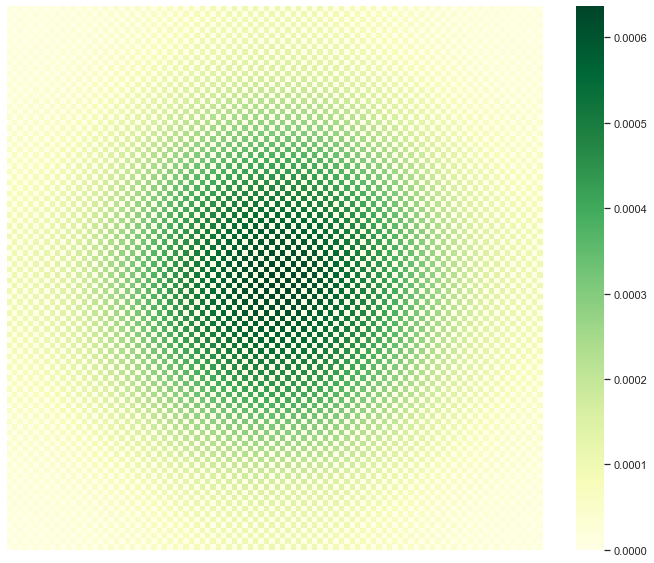

In [21]:
plt.figure(figsize = [12,10])
sns.heatmap(P,annot=False,cmap='YlGn')
plt.axis(False)
plt.show()

#### Much Finner

In [22]:
L = 200
nrun = 1000
P = start(L)

'''run diffusion'''
P = run_diffuse(P,nrun,L)

In [23]:
plt.figure(figsize = [12,10])
sns.heatmap(P,annot=False,cmap='YlGn')
plt.axis(False)
plt.show()